In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
!ls

datalab


In [3]:
!pip install keras # it seems that things are already installed

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple


In [5]:
# below will upload a file in your local machine to google colab VM
# here I manually selected (click choose files button below) the csv file from the local machine
# when uploaded, the file sits on VM and will not appear on your google drive unless you link them
# for more info on IO see 
# https://colab.research.google.com/notebook#fileId=/v2/external/notebooks/io.ipynb&scrollTo=hauvGV4hV-Mh
# just in case, do not upload data containing sensitive matter (such as personal identification info)

from google.colab import files 
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving labels.csv.zip to labels.csv.zip
Saving train.zip to train.zip
User uploaded file "labels.csv.zip" with length 218954 bytes
User uploaded file "train.zip" with length 361279070 bytes


In [15]:
!ls


datalab  labels  labels.csv.zip  train	train.zip


In [24]:
!unzip labels.csv.zip -d dog-breed-identification/

Archive:  labels.csv.zip
  inflating: dog-breed-identification/labels.csv  


In [25]:
!unzip train.zip -d dog-breed-identification/

Archive:  train.zip
   creating: dog-breed-identification/train/
  inflating: dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg  
  inflating: dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg  
  inflating: dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg  
  inflating: dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg  
  inflating: dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg  
  inflating: dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg  
  inflating: dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg  
  inflating: dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg  
  inflating: dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg  
  inflating: dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg  
  inflating: dog-breed-identification/train/004396df1acd0f1247b740ca2b14616e.jpg  
  inflating: dog-breed

  inflating: dog-breed-identification/train/0943d1d4677ab876b52468096baaa2ce.jpg  
  inflating: dog-breed-identification/train/0944fbca92fad9a38af10b3d1943cb54.jpg  
  inflating: dog-breed-identification/train/09477e5059ebb15cad5f37fb3b9b1889.jpg  
  inflating: dog-breed-identification/train/094b97e52d00895fbf6769724e1b0e7d.jpg  
  inflating: dog-breed-identification/train/0959e919604a931fc1ae379b7a75911a.jpg  
  inflating: dog-breed-identification/train/095d868f796f86c8258750365a04f2cd.jpg  
  inflating: dog-breed-identification/train/0964a2558fc9aa293a6a934d49f64968.jpg  
  inflating: dog-breed-identification/train/0964e161b379740955fa95d8d4c8697e.jpg  
  inflating: dog-breed-identification/train/0974b614b86b829821067bd0b1808b8c.jpg  
  inflating: dog-breed-identification/train/097ef8eca8fc340249b0bbc2b745972c.jpg  
  inflating: dog-breed-identification/train/098333d51970304787c7061f3e683c5b.jpg  
  inflating: dog-breed-identification/train/09839ef1c5a5a5b3acb61c4093cab07f.jpg  
  in

  inflating: dog-breed-identification/train/143ce5343024462044b72de531b5ff08.jpg  
  inflating: dog-breed-identification/train/143d5305a4055398828d5b7e3aa8f75b.jpg  
  inflating: dog-breed-identification/train/14597c96d5c222eebd742f4207296314.jpg  
  inflating: dog-breed-identification/train/145ec132c2a1cc4291bd774c7f78c871.jpg  
  inflating: dog-breed-identification/train/145f7bb3bf6e4877b8b6624f612a1c24.jpg  
  inflating: dog-breed-identification/train/1465759436b4acd2748dd50108b90ca9.jpg  
  inflating: dog-breed-identification/train/146b732430bb63d5338fc6b7a8fc0135.jpg  
  inflating: dog-breed-identification/train/146be641443a270dd8116f65d53d0c9d.jpg  
  inflating: dog-breed-identification/train/146c249bf2d60bf30c309341020bf2ee.jpg  
  inflating: dog-breed-identification/train/146c8ed2e65ed9e04d8302bf1d96815a.jpg  
  inflating: dog-breed-identification/train/146fa113f3d8ad6e0effe9719e09cef1.jpg  
  inflating: dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg  
  in

  inflating: dog-breed-identification/train/1f7cf21f817c33782188d57fb12a4628.jpg  
  inflating: dog-breed-identification/train/1f80a26289896fac1169e49e02dcff1b.jpg  
  inflating: dog-breed-identification/train/1f825609b43784e073b718ec559ed397.jpg  
  inflating: dog-breed-identification/train/1f913ada2a4fdb5b237112014087d5dc.jpg  
  inflating: dog-breed-identification/train/1fa23d3d5aeaefcabb88d84db1264b64.jpg  
  inflating: dog-breed-identification/train/1fa34ed77b77aaedb62094d6fa82bda8.jpg  
  inflating: dog-breed-identification/train/1fa58b790c9e191f23dfbad962236f25.jpg  
  inflating: dog-breed-identification/train/1fa82619012d8693282ace6d05e81ccd.jpg  
  inflating: dog-breed-identification/train/1fbe78c5135f73d021aaa756ca69fe95.jpg  
  inflating: dog-breed-identification/train/1fbebdbf9b6e681956b1c33b56a09a5a.jpg  
  inflating: dog-breed-identification/train/1fc16112b9cc5a249b9b8331fa06335d.jpg  
  inflating: dog-breed-identification/train/1fc94c31099ae9b6be417f5d07b4f61a.jpg  
  in

  inflating: dog-breed-identification/train/2adc0323ecf18ff1dc969f4cca885539.jpg  
  inflating: dog-breed-identification/train/2ae0c93bbde7a8f13ed5583d97352a83.jpg  
  inflating: dog-breed-identification/train/2ae2f3582606b45659a29dbff0311ac4.jpg  
  inflating: dog-breed-identification/train/2ae784251c577222be8f7f3cef36e2d0.jpg  
  inflating: dog-breed-identification/train/2ae9f5755f70cf91904ee19f7759b065.jpg  
  inflating: dog-breed-identification/train/2af698f7a9582431f12768ee3878d139.jpg  
  inflating: dog-breed-identification/train/2b05cee92b607aeff9943930a59119db.jpg  
  inflating: dog-breed-identification/train/2b0b8b38b39912cbe671211199a2ecf3.jpg  
  inflating: dog-breed-identification/train/2b0beabe94af30c51d3d3149c4832c38.jpg  
  inflating: dog-breed-identification/train/2b20b95a67ae06fff91adadd666b79c6.jpg  
  inflating: dog-breed-identification/train/2b30ed72929cb94d91e4f6a5d821b64a.jpg  
  inflating: dog-breed-identification/train/2b366c121d11beea15d42bd86853462a.jpg  
  in

  inflating: dog-breed-identification/train/37b5d37070d1d054d1879e923775a1a9.jpg  
  inflating: dog-breed-identification/train/37b5ff23f0fbc4795a3bbf720b9ffd06.jpg  
  inflating: dog-breed-identification/train/37b617c8586566870ef2fb65fbec59c0.jpg  
  inflating: dog-breed-identification/train/37b94832dd76b088295aed75eb06a7c3.jpg  
  inflating: dog-breed-identification/train/37b9633e115cca01282b85db6f9ea20c.jpg  
  inflating: dog-breed-identification/train/37bb10379fafdff135f71ac489434f2c.jpg  
  inflating: dog-breed-identification/train/37cc1bed158bbb562c22682492d2673a.jpg  
  inflating: dog-breed-identification/train/37d05a8ceaa09cc7bbafa72e9acb7e01.jpg  
  inflating: dog-breed-identification/train/37d64a9f655d5cba312871de55c3d194.jpg  
  inflating: dog-breed-identification/train/37dc6b7f49b757855bcbf64d7f203b5d.jpg  
  inflating: dog-breed-identification/train/37de257f7c02f6c4d4bd6441d224c941.jpg  
  inflating: dog-breed-identification/train/37e02d7e4421b6db765d08e4a4775406.jpg  
  in

  inflating: dog-breed-identification/train/423ecc301b5f40d1fc897749b42ffb5e.jpg  
  inflating: dog-breed-identification/train/42404238339c427c0fb830da89885d5e.jpg  
  inflating: dog-breed-identification/train/4240aa05faa5a88b85103ec5fccbafad.jpg  
  inflating: dog-breed-identification/train/424b110908fc9d0a236d900a598fa5b0.jpg  
  inflating: dog-breed-identification/train/424c3990e83cdb18b5d0fe48a5cf7327.jpg  
  inflating: dog-breed-identification/train/42531d3868f3b2a07257fee6abf30af0.jpg  
  inflating: dog-breed-identification/train/4256019f31cf585155e3e5154e4cb017.jpg  
  inflating: dog-breed-identification/train/4256b386d18a2c34d9d2b982f3a692bd.jpg  
  inflating: dog-breed-identification/train/4258f72c43fec0805948ae3a72a9f389.jpg  
  inflating: dog-breed-identification/train/425f6665a1616c4819d20580d09d5e8b.jpg  
  inflating: dog-breed-identification/train/426142d965a9b12b9d4d82363ebbf3a4.jpg  
  inflating: dog-breed-identification/train/42672a27407ebb1beddbbac746c304bc.jpg  
  in

  inflating: dog-breed-identification/train/4d55df003701ba79f6a485bdee850f3a.jpg  
  inflating: dog-breed-identification/train/4d5d1e37be499fe7250bff7afe97bc5f.jpg  
  inflating: dog-breed-identification/train/4d60034b2d3fe176b6339e23e018e536.jpg  
  inflating: dog-breed-identification/train/4d614950ef0c339983c82be5cc133783.jpg  
  inflating: dog-breed-identification/train/4d67f3d5c331a1a83c9eede0df8e3e37.jpg  
  inflating: dog-breed-identification/train/4d6b4f0c8596fec0b0ecedff88b30f8d.jpg  
  inflating: dog-breed-identification/train/4d6bd9c5ec39dce290aa89809a222b3b.jpg  
  inflating: dog-breed-identification/train/4d6c2eb3cf393af1601751a39647a78b.jpg  
  inflating: dog-breed-identification/train/4d6f99b3534a4064f83b2dbba4a297a2.jpg  
  inflating: dog-breed-identification/train/4d705f069d5a67c6132c386cc25ed117.jpg  
  inflating: dog-breed-identification/train/4d770fc42e727251f98ae8e451c4a9dc.jpg  
  inflating: dog-breed-identification/train/4d777d9c55a9e8f7114992e34190e719.jpg  
  in

  inflating: dog-breed-identification/train/5890a31936422f660462407b1176d1ee.jpg  
  inflating: dog-breed-identification/train/58a604f4ec2a831e0b6281bafc404ec1.jpg  
  inflating: dog-breed-identification/train/58a6a34a91059b13bfda501c64a7356c.jpg  
  inflating: dog-breed-identification/train/58a7bcb4d05eaad860c3c1ae40700991.jpg  
  inflating: dog-breed-identification/train/58abdd8d3181ebefe29f285d8224ab38.jpg  
  inflating: dog-breed-identification/train/58b65ec927e0fbc07c006ee3f10cd16c.jpg  
  inflating: dog-breed-identification/train/58bc6a921d165bbf910e815924652daf.jpg  
  inflating: dog-breed-identification/train/58bc6d2de4433461b9406af472fefca7.jpg  
  inflating: dog-breed-identification/train/58bd9bfcee7de5692e700b85ec03ec36.jpg  
  inflating: dog-breed-identification/train/58ca1366de1592e48fefa05d4c833942.jpg  
  inflating: dog-breed-identification/train/58d58b7ce35bfe51429fa6b18fb2d479.jpg  
  inflating: dog-breed-identification/train/58d8992675d2ce51851ca6e45b490542.jpg  
  in

  inflating: dog-breed-identification/train/61c3e70be1930932e4d24135ea0881c7.jpg  
  inflating: dog-breed-identification/train/61c63f61e39b32ce3a1be68c1b252006.jpg  
  inflating: dog-breed-identification/train/61c915a4460bc188b3524dfd8746db67.jpg  
  inflating: dog-breed-identification/train/61cb6ff2047f630e9b39fe328dd6ff8b.jpg  
  inflating: dog-breed-identification/train/61cbb86183b0c0253b3aa2fb234b8776.jpg  
  inflating: dog-breed-identification/train/61cf8e700e9414a071a03ebc6abe397d.jpg  
  inflating: dog-breed-identification/train/61d4222fa93848e18d1e9f39e9644c48.jpg  
  inflating: dog-breed-identification/train/61e259f889548a4cfd3ffc5258de2a60.jpg  
  inflating: dog-breed-identification/train/61eac66456c44895c40b409eaaf60882.jpg  
  inflating: dog-breed-identification/train/61ed92e20581e6de8e009209ef7a7cad.jpg  
  inflating: dog-breed-identification/train/61ee3e61d002e571a3066ab8aacfad0c.jpg  
  inflating: dog-breed-identification/train/61f405ff25ed2f1f65fad6f20b61dbc0.jpg  
  in

  inflating: dog-breed-identification/train/6d2fe8f0bb9bbc3232567cd6d930a1e4.jpg  
  inflating: dog-breed-identification/train/6d3998aa9d4b5788e3fab3b1759735a8.jpg  
  inflating: dog-breed-identification/train/6d3cb100e08aacd287ef1b44f2f55a25.jpg  
  inflating: dog-breed-identification/train/6d3d71bbfff198971e5dfdc16cbfc311.jpg  
  inflating: dog-breed-identification/train/6d3f6ca40680a6611097ab283d76b5fb.jpg  
  inflating: dog-breed-identification/train/6d3fc8ed4a7e7cf155795c7f90ef8aec.jpg  
  inflating: dog-breed-identification/train/6d442a4b0378d62ef6127d33f0acfc81.jpg  
  inflating: dog-breed-identification/train/6d49de8f03116d2fcf3eb6942a9c6233.jpg  
  inflating: dog-breed-identification/train/6d5eebf6f23457de5bae2fdc966c9818.jpg  
  inflating: dog-breed-identification/train/6d69c79c5ee17a5bded1c1d9342e76e3.jpg  
  inflating: dog-breed-identification/train/6d6ea5617e4a3b34ad409f79f9a2c255.jpg  
  inflating: dog-breed-identification/train/6d70ba62b2f3f73a28d77d519d3f477b.jpg  
  in

  inflating: dog-breed-identification/train/76fd190c3cba9f9fcee27b206a0ab886.jpg  
  inflating: dog-breed-identification/train/77025d2001aabd615d18015a28ef8893.jpg  
  inflating: dog-breed-identification/train/770c67d2d1c05302c985a8fe57c24f0f.jpg  
  inflating: dog-breed-identification/train/770de66127639f0a2c88a2f42631378e.jpg  
  inflating: dog-breed-identification/train/770e93c5d9961cc0b72dc41069cdaa62.jpg  
  inflating: dog-breed-identification/train/771145b82a29f68c70e29f7bbb58797b.jpg  
  inflating: dog-breed-identification/train/77206715d37089e33d8c126485ba24c7.jpg  
  inflating: dog-breed-identification/train/77206fa9b8356386a19d7d5e130f863a.jpg  
  inflating: dog-breed-identification/train/77257e84ad1baee850c33f5ad5cf90a0.jpg  
  inflating: dog-breed-identification/train/773f83245c9206fd7f67812b064b4117.jpg  
  inflating: dog-breed-identification/train/7742f1ede5c9e95b93dcbaee009f6e87.jpg  
  inflating: dog-breed-identification/train/7749d60e894cbd4d018c4ffd960d4e4e.jpg  
  in

  inflating: dog-breed-identification/train/813c490609f7b3aab070ebb1d110e982.jpg  
  inflating: dog-breed-identification/train/813f7061a301759e6fe78f360ff4cd07.jpg  
  inflating: dog-breed-identification/train/8141b7ef2da931d7441d3c883ce65b57.jpg  
  inflating: dog-breed-identification/train/8141c029e973ca29be09417267d1e50b.jpg  
  inflating: dog-breed-identification/train/814a9fc5db2614bbe59328c16496b50e.jpg  
  inflating: dog-breed-identification/train/814be837610c46b122ff45f71e97133d.jpg  
  inflating: dog-breed-identification/train/815079d1d62429b3134f2afa1a53ef65.jpg  
  inflating: dog-breed-identification/train/815949fad325d5bd758bd46c2bbccfaf.jpg  
  inflating: dog-breed-identification/train/815d3c084bcb79bed798a9774d4ce66b.jpg  
  inflating: dog-breed-identification/train/8161ff9d8b2b1b91280f268463c51065.jpg  
  inflating: dog-breed-identification/train/8165da6ab285d889a8a6f1980aad5869.jpg  
  inflating: dog-breed-identification/train/81662662eb22135f0438459487722f98.jpg  
  in

  inflating: dog-breed-identification/train/8d081a85379005be35b81747dc8873fa.jpg  
  inflating: dog-breed-identification/train/8d0f47344bd67acf7ca366190aac064e.jpg  
  inflating: dog-breed-identification/train/8d19a2d1a7027646ed367ec35bfe6b8c.jpg  
  inflating: dog-breed-identification/train/8d19b5c9f212ccbc4df8546c7a572919.jpg  
  inflating: dog-breed-identification/train/8d2dc9668eadcd1eec60c27a9680c45f.jpg  
  inflating: dog-breed-identification/train/8d2eba220c4199ebd37db6bceabf4969.jpg  
  inflating: dog-breed-identification/train/8d32ca9b3faddc11fa5488ab18b4cefe.jpg  
  inflating: dog-breed-identification/train/8d469d98dc5b185f7dbe736389ed6234.jpg  
  inflating: dog-breed-identification/train/8d4b28ae56c225f870139cdfeff5131c.jpg  
  inflating: dog-breed-identification/train/8d545ea0a05cfbdc5b0ba95a3290bf48.jpg  
  inflating: dog-breed-identification/train/8d5737b4275e379c36e3797400862f6e.jpg  
  inflating: dog-breed-identification/train/8d59450a985ebb3790c70d672e616c68.jpg  
  in

  inflating: dog-breed-identification/train/990103331becc3d72956ba681d15e9bd.jpg  
  inflating: dog-breed-identification/train/99165d7393c0160026d50e609872ff78.jpg  
  inflating: dog-breed-identification/train/99182fba5c37873fe94ebbe9e5b7e298.jpg  
  inflating: dog-breed-identification/train/991e84fa081bd97caec9f23672a3bf0a.jpg  
  inflating: dog-breed-identification/train/992985d9287168502fa34d6de994e946.jpg  
  inflating: dog-breed-identification/train/9931b86cd8146a12ab93965606f71309.jpg  
  inflating: dog-breed-identification/train/993d092d60fbdf285c20183c5dcf1832.jpg  
  inflating: dog-breed-identification/train/993d2f8fb3e675c362d4f502899cb260.jpg  
  inflating: dog-breed-identification/train/993f57792daa5783e0f4c93b32ca1fec.jpg  
  inflating: dog-breed-identification/train/9951edcf2d8205b7ddc7933f93b3bb24.jpg  
  inflating: dog-breed-identification/train/99562538c149ae254d2ba0172c145e66.jpg  
  inflating: dog-breed-identification/train/995b2cd115180d93f87a72f7b09715ce.jpg  
  in

  inflating: dog-breed-identification/train/a1d50b778141d7a13c07a7f366524f1b.jpg  
  inflating: dog-breed-identification/train/a1d611d5b9c3ed31ecfe766edb018892.jpg  
  inflating: dog-breed-identification/train/a1d9956e2e50c9f909342d26e1d32016.jpg  
  inflating: dog-breed-identification/train/a1dfedd16f94ca093e79f93f3eb6e03d.jpg  
  inflating: dog-breed-identification/train/a1e14ddc9300d0cad934c3db77f37f62.jpg  
  inflating: dog-breed-identification/train/a1e4ab6fe9d1255bac0157273d64e18a.jpg  
  inflating: dog-breed-identification/train/a1eb2b04c498844ec38bf5ac5b6184e7.jpg  
  inflating: dog-breed-identification/train/a1f247bf7e85c9b23b5361dab02e253a.jpg  
  inflating: dog-breed-identification/train/a1fe7ef738fcd920e4d521d5fc4092d4.jpg  
  inflating: dog-breed-identification/train/a204ac96b29ca9f6af5571194e14ea8e.jpg  
  inflating: dog-breed-identification/train/a21caab32c00011d38f1e409fbf65d19.jpg  
  inflating: dog-breed-identification/train/a2231ba7d07b51253f5c443540896d16.jpg  
  in

  inflating: dog-breed-identification/train/ac5dc2c927e0c8ba959dfd1938d288b2.jpg  
  inflating: dog-breed-identification/train/ac63a26c445b5e7c92bbd09b1abe1673.jpg  
  inflating: dog-breed-identification/train/ac6445debf13b337a2ae5c26cc63f1e5.jpg  
  inflating: dog-breed-identification/train/ac73b824dd06d8d6527257edd6147c5f.jpg  
  inflating: dog-breed-identification/train/ac7499729040d6037a2aac17f0466451.jpg  
  inflating: dog-breed-identification/train/ac81bd5676488e9523fba872efbe383f.jpg  
  inflating: dog-breed-identification/train/ac85c489cb78fce3b455bfbba0d02094.jpg  
  inflating: dog-breed-identification/train/ac880daeb1f7203245c2c9e47b0e3db7.jpg  
  inflating: dog-breed-identification/train/ac8869ca8acc2334a3e034c4ad8d0b68.jpg  
  inflating: dog-breed-identification/train/ac936b37580301b42c4f3f1b6baf4142.jpg  
  inflating: dog-breed-identification/train/aca5fb5688fbbd2949a369534af84c6b.jpg  
  inflating: dog-breed-identification/train/acc563b94d6d975020a4fdd036bb1aa7.jpg  
  in

  inflating: dog-breed-identification/train/b51b8b30da4501c9907d100df382b87c.jpg  
  inflating: dog-breed-identification/train/b51e9d68eb9a95484d2e64ac7a606384.jpg  
  inflating: dog-breed-identification/train/b520efcc428dc8666a138d1f6eb65853.jpg  
  inflating: dog-breed-identification/train/b522b9ad41145386ae378fdffaf009e7.jpg  
  inflating: dog-breed-identification/train/b527d1075cc07fc8375378ca990ee241.jpg  
  inflating: dog-breed-identification/train/b52bb521afa1dfe802a27a8939a8c7d0.jpg  
  inflating: dog-breed-identification/train/b532e2e6f68876649639aa216ea4cddf.jpg  
  inflating: dog-breed-identification/train/b53646b931972d951b7306584a00cfc4.jpg  
  inflating: dog-breed-identification/train/b54c71c47f3d46a3bf72fbd9301de6fa.jpg  
  inflating: dog-breed-identification/train/b54cef53d681db71d03a4e4230acefc8.jpg  
  inflating: dog-breed-identification/train/b556b3f4cfbf4775dc52b0a62aa21e3d.jpg  
  inflating: dog-breed-identification/train/b55c04ec49499cc1383468ac5620ae63.jpg  
  in

  inflating: dog-breed-identification/train/be7ae0578e96cd21c69b54b5252c1443.jpg  
  inflating: dog-breed-identification/train/be7e3d9f900baa5f8b62c3a909ba5a67.jpg  
  inflating: dog-breed-identification/train/be80e33520a60fa111dacff844efe848.jpg  
  inflating: dog-breed-identification/train/be851757fed72c4ce6d20188962c0b19.jpg  
  inflating: dog-breed-identification/train/be8b04c1ad3228932fb0ebb9d103dbd0.jpg  
  inflating: dog-breed-identification/train/be8c5599351bfc3946cd302da9496d99.jpg  
  inflating: dog-breed-identification/train/be9686a8b005707ab13d8f5dff1d7431.jpg  
  inflating: dog-breed-identification/train/be9a01353a44e997ffab49c6d9d3a309.jpg  
  inflating: dog-breed-identification/train/be9a79b75ab68064bbcecbd4eb4ef959.jpg  
  inflating: dog-breed-identification/train/be9c349a5a1ebba4ac4653f6316cfb9c.jpg  
  inflating: dog-breed-identification/train/bea765154749ffbccdc2e4321027e3a8.jpg  
  inflating: dog-breed-identification/train/bea8d132fc8d6264c6fa1c2eb10e4482.jpg  
  in

  inflating: dog-breed-identification/train/c72a277989f49b475ebbe4fd18906370.jpg  
  inflating: dog-breed-identification/train/c72af1c49f764ef8150bd1b1a096e5c6.jpg  
  inflating: dog-breed-identification/train/c72cad3c532886e10001f99c4a954156.jpg  
  inflating: dog-breed-identification/train/c72d3f068d6fa7929104de1c6f308c1c.jpg  
  inflating: dog-breed-identification/train/c73a535187af35a25faf061ce0739b21.jpg  
  inflating: dog-breed-identification/train/c7441fba1f18864b59b1d474936def91.jpg  
  inflating: dog-breed-identification/train/c746f8858f83b2be8d985b152ebe1303.jpg  
  inflating: dog-breed-identification/train/c750ad78e8e6ac798ef2b9c648abfab7.jpg  
  inflating: dog-breed-identification/train/c750f80ab143fc7e82843db3722be53c.jpg  
  inflating: dog-breed-identification/train/c752f1673409acb094792c428025b94e.jpg  
  inflating: dog-breed-identification/train/c761baad1c531847cf53b7e48c802601.jpg  
  inflating: dog-breed-identification/train/c76fed6a1fde742765e9e78347dcf664.jpg  
  in

  inflating: dog-breed-identification/train/d120834472b4ef2520e5860b0f3b0500.jpg  
  inflating: dog-breed-identification/train/d13131f5b2771e917e58fd49cb710cad.jpg  
  inflating: dog-breed-identification/train/d132a0af92ff56fe35d1811b8eae95f0.jpg  
  inflating: dog-breed-identification/train/d1337daa2bbfbfab34a937f0ff1cedec.jpg  
  inflating: dog-breed-identification/train/d146d9004a5895ed0efd91636c751d74.jpg  
  inflating: dog-breed-identification/train/d146f0cc0ce9bc0cb3514618affbd028.jpg  
  inflating: dog-breed-identification/train/d153a102953bac7ee4dca7b2919111ee.jpg  
  inflating: dog-breed-identification/train/d155359376470f2e707ac73e636eb5b2.jpg  
  inflating: dog-breed-identification/train/d15663dbbbcbde9517ae67284c664897.jpg  
  inflating: dog-breed-identification/train/d15c761ba986dc194be3170ded786d3b.jpg  
  inflating: dog-breed-identification/train/d1676f45ee40b1c585ddc56b2a63c402.jpg  
  inflating: dog-breed-identification/train/d1718b1895cc6a7e9ed92087d87f29b2.jpg  
  in

  inflating: dog-breed-identification/train/db84277a5adca6b4a349396f6070287f.jpg  
  inflating: dog-breed-identification/train/db8cdf3de2c08f37e50c29b89a0bfa2d.jpg  
  inflating: dog-breed-identification/train/db906850433ed033317baa34a0905fb4.jpg  
  inflating: dog-breed-identification/train/db953c4fb2ef6767dd6c817574b4e447.jpg  
  inflating: dog-breed-identification/train/db9f0d772b4b3b2452c7d6f92bb35f9c.jpg  
  inflating: dog-breed-identification/train/dba4ae5fe8b6c1651111ce96c6fbacb4.jpg  
  inflating: dog-breed-identification/train/dbb4eaefd7d8c11637d1ee5c2c819427.jpg  
  inflating: dog-breed-identification/train/dbb75e40f88b9703dbfe196f6ec57b3b.jpg  
  inflating: dog-breed-identification/train/dbbdbfbe8184ff95c6f9f6838b0aefb8.jpg  
  inflating: dog-breed-identification/train/dbc7b27136e58946665a82f4ff6209ba.jpg  
  inflating: dog-breed-identification/train/dbd006d2d983a1b52238dc293d5139c0.jpg  
  inflating: dog-breed-identification/train/dbde111456535431c6caedfa5b8c8dea.jpg  
  in

  inflating: dog-breed-identification/train/e6eb11571ef963fac4d2300df3122f85.jpg  
  inflating: dog-breed-identification/train/e6f837210a5b4c4f171b21f3a43ae12b.jpg  
  inflating: dog-breed-identification/train/e6ff9171c960a31363798343982338c4.jpg  
  inflating: dog-breed-identification/train/e716ae8410966853094bd28b0829feff.jpg  
  inflating: dog-breed-identification/train/e728ffc9ca204977f2cc3c502c68d823.jpg  
  inflating: dog-breed-identification/train/e734678e0c18e103c41023e11b92e012.jpg  
  inflating: dog-breed-identification/train/e73d792517b5e717709ed11782adddf8.jpg  
  inflating: dog-breed-identification/train/e748f61d39da506904f531c7732df512.jpg  
  inflating: dog-breed-identification/train/e74d4ff0bbbaed7ed27b0dc3a27aadb1.jpg  
  inflating: dog-breed-identification/train/e74f33ae3d78d3d2f8c75b8fc847f5ad.jpg  
  inflating: dog-breed-identification/train/e7518def797fd4193bebc97d52ecd66f.jpg  
  inflating: dog-breed-identification/train/e75f2316c5dd47b87a22bbe95cf8b8da.jpg  
  in

  inflating: dog-breed-identification/train/ef0ca2e519acbcd5f7f03a97acdf0ef1.jpg  
  inflating: dog-breed-identification/train/ef0cecbeaee4a08448d449a7c1e65f17.jpg  
  inflating: dog-breed-identification/train/ef1129cb127bff04fd3940d94f2a259b.jpg  
  inflating: dog-breed-identification/train/ef14fa3af6b0cfb89b4e0ec98f75e586.jpg  
  inflating: dog-breed-identification/train/ef16bf875e06977bfe0d4059326afffc.jpg  
  inflating: dog-breed-identification/train/ef1bdfc864035ed213fd676c24ba14f0.jpg  
  inflating: dog-breed-identification/train/ef22e67b6d82c04f2d17249e42769d35.jpg  
  inflating: dog-breed-identification/train/ef29bc9846ee0f3599ee6c3791e5eb30.jpg  
  inflating: dog-breed-identification/train/ef3dc6a3af2210c9cc59e2bbdc9e9ae1.jpg  
  inflating: dog-breed-identification/train/ef4efe7980d873475501b56804670c6a.jpg  
  inflating: dog-breed-identification/train/ef50a04a3363a88a9ab1c8e5f2bfd687.jpg  
  inflating: dog-breed-identification/train/ef519fe81769185abaf3bf9615f31b02.jpg  
  in

  inflating: dog-breed-identification/train/f901b7392fff2c1c3991bb8f7b31bfe3.jpg  
  inflating: dog-breed-identification/train/f901c393eca491f1c03b88b31fa956fc.jpg  
  inflating: dog-breed-identification/train/f9024336c267f4dd4de82cf5f617ffa0.jpg  
  inflating: dog-breed-identification/train/f90e5fa3f7dabd3292fecf4312ba98c4.jpg  
  inflating: dog-breed-identification/train/f918d591dda3b7c1490f70dc92a7fb8e.jpg  
  inflating: dog-breed-identification/train/f921b60576b1055884307f1f6d42997f.jpg  
  inflating: dog-breed-identification/train/f922fcb519e1f55ca99e8c3bb9e07619.jpg  
  inflating: dog-breed-identification/train/f94a145a3a291fc2c535d135938aea72.jpg  
  inflating: dog-breed-identification/train/f955bc6cf429a3957922f4155689c857.jpg  
  inflating: dog-breed-identification/train/f9561a534df6add1af1806bfa1558fde.jpg  
  inflating: dog-breed-identification/train/f95ac23ee909194006c538c4fc6e6750.jpg  
  inflating: dog-breed-identification/train/f9698ad44b009757cfacd9f171310651.jpg  
  in

In [11]:
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Input, Activation, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model
import keras.backend as K
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers

Using TensorFlow backend.


In [16]:
filename = 'labels/labels.csv'
df = pd.read_csv(filename)
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
# Create a local file to upload.
with open('/tmp/to_upload.txt', 'w') as f:
  f.write('my sample file')

print('/tmp/to_upload.txt contains:')
!cat /tmp/to_upload.txt

/tmp/to_upload.txt contains:
my sample file

In [0]:
# First, we need to set our project. Replace the assignment below
# with your project ID.
project_id = 'dogs-202204'


In [0]:
!gcloud config set project {project_id}

Updated property [core/project].


In [0]:
import uuid

# Make a unique bucket to which we'll upload the file.
# (GCS buckets are part of a single global namespace.)
bucket_name = 'dogbucket' + str(uuid.uuid1())

# Full reference: https://cloud.google.com/storage/docs/gsutil/commands/mb
!gsutil mb gs://{bucket_name}

Creating gs://dogbucket5329dd5c-483f-11e8-9f5c-0242ac110002/...
AccessDeniedException: 403 The project to be billed has not configured billing.


In [0]:
from google.colab import auth
auth.authenticate_user()

In [23]:
!mkdir "dog-breed-identification"
!ls


datalab  dog-breed-identification  labels  labels.csv.zip  train  train.zip


In [18]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
    100% |████████████████████████████████| 51kB 2.1MB/s 


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.linear_model import LogisticRegression

In [46]:
INPUT_SIZE = 224
NUM_CLASSES = 16
SEED = 1987
data_dir = 'dog-breed-identification'
labels = pd.read_csv(join(data_dir, 'labels.csv'))
print(len(listdir(join(data_dir, 'train'))), len(labels))


10222 10222


In [47]:
selected_breed_list = list(labels.groupby('breed').count().sort_values(by='id', ascending=False).head(NUM_CLASSES).index)
labels = labels[labels['breed'].isin(selected_breed_list)]
labels['target'] = 1
labels['rank'] = labels.groupby('breed').rank()['id']
labels_pivot = labels.pivot('id', 'breed', 'target').reset_index().fillna(0)
np.random.seed(seed=SEED)
rnd = np.random.random(len(labels))
train_idx = rnd < 0.8
valid_idx = rnd >= 0.8
y_train = labels_pivot[selected_breed_list].values
ytr = y_train[train_idx]
yv = y_train[valid_idx]
print(y_train.shape)

(1777, 16)


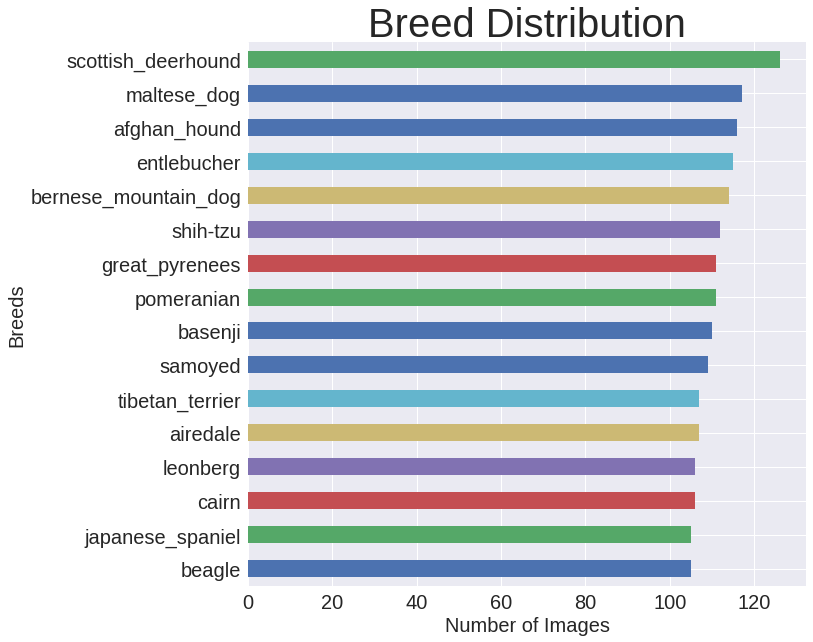

In [48]:
bar=pd.value_counts(labels['breed'],ascending=True).plot(kind='barh',
                                                       fontsize="20",
                                                       title="Breed Distribution",
                                                       figsize=(10,10))
bar.set(xlabel="Number of Images", ylabel="Breeds")
bar.xaxis.label.set_size(20)
bar.yaxis.label.set_size(20)
bar.title.set_size(40)
plt.show()

In [0]:
def read_img(img_id, train_or_test, size):
    """Read and resize image.
    # Arguments
        img_id: string
        train_or_test: string 'train' or 'test'.
        size: resize the original image.
    # Returns
        Image as numpy array.
    """
    img = image.load_img(join(data_dir, train_or_test, '%s.jpg' % img_id), target_size=size)
    img = image.img_to_array(img)
    return img

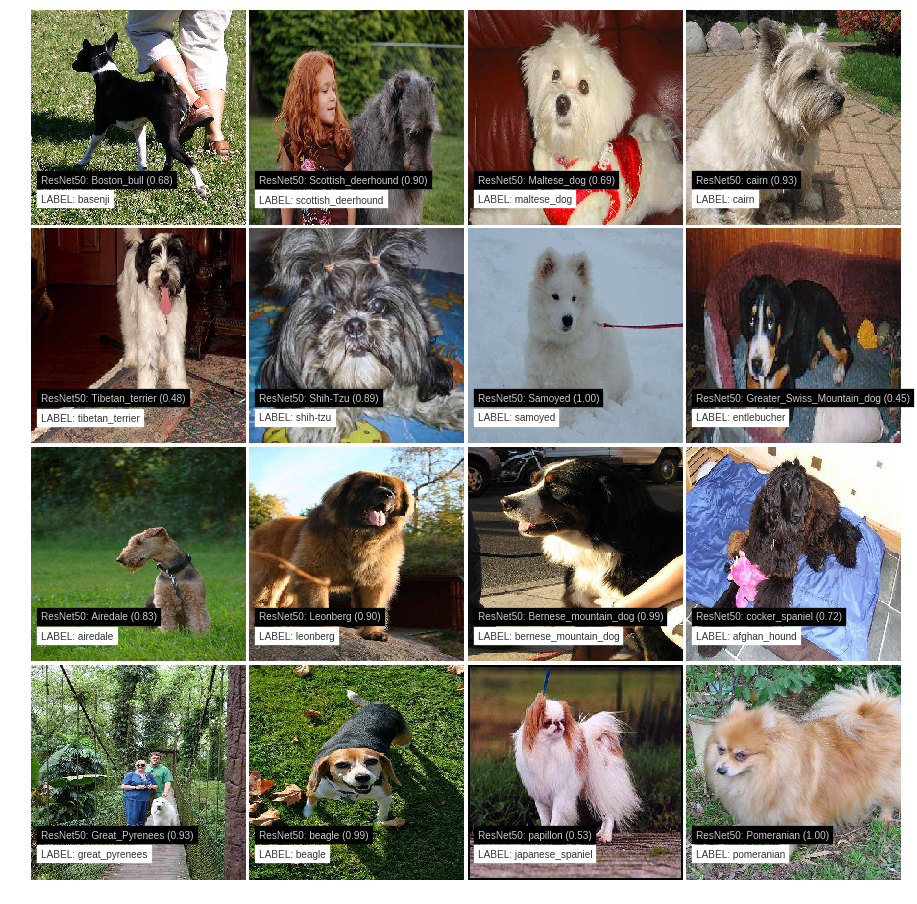

In [50]:
#test on ResNet make sure everything is loading right
model = ResNet50(weights='imagenet')
j = int(np.sqrt(NUM_CLASSES))
i = int(np.ceil(1. * NUM_CLASSES / j))
fig = plt.figure(1, figsize=(16, 16))
grid = ImageGrid(fig, 111, nrows_ncols=(i, j), axes_pad=0.05)
for i, (img_id, breed) in enumerate(labels.loc[labels['rank'] == 1, ['id', 'breed']].values):
    ax = grid[i]
    img = read_img(img_id, 'train', (224, 224))
    ax.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    preds = model.predict(x)
    _, imagenet_class_name, prob = decode_predictions(preds, top=1)[0][0]
    ax.text(10, 180, 'ResNet50: %s (%.2f)' % (imagenet_class_name , prob), color='w', backgroundcolor='k', alpha=0.8)
    ax.text(10, 200, 'LABEL: %s' % breed, color='k', backgroundcolor='w', alpha=0.8)
    ax.axis('off')
plt.show()

In [105]:
INPUT_SIZE = 100
POOLING = 'avg'
x_train = np.zeros((len(labels), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
for i, img_id in tqdm(enumerate(labels['id'])):
    img = read_img(img_id, 'train', (INPUT_SIZE, INPUT_SIZE))
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    x_train[i] = x
print('Train Images shape: {} size: {:,}'.format(x_train.shape, x_train.size))

1777it [00:06, 272.87it/s]

Train Images shape: (1777, 100, 100, 3) size: 53,310,000


In [106]:
Xtr = x_train[train_idx]
Xv = x_train[valid_idx]
print((Xtr.shape, Xv.shape, ytr.shape, yv.shape))

((1409, 100, 100, 3), (368, 100, 100, 3), (1409, 16), (368, 16))


In [0]:
import time
import numpy
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam

K.set_image_dim_ordering( 'tf' )


In [0]:
def inception1(x, n = 32):
    p1 = Conv2D(n, 1, activation ='relu', padding='same')(x)
    p2 = Conv2D(n, 3, activation ='relu', padding='same')(x)
    p3 = Conv2D(n, 5, activation ='relu', padding='same')(x)
    p4 = MaxPooling2D((3,3), strides=(1, 1), padding='same')(x)
    c =  Concatenate(axis=-1)([p1,p2,p3,p4])
    return c

In [0]:
def model1():
    inputs = Input(Xtr.shape[1:])
    i1 = inception1(inputs)
    mp1 = MaxPooling2D((2,2))(i1)
    i2 = inception1(mp1)
    mp2 = MaxPooling2D((2,2))(i2) 
    f = Flatten()(mp2)
    d = Dense(128, activation='relu')(f)
    out = Dense(16, activation='softmax')(d)
    model = Model(inputs, out)
    return model

In [76]:
model1 = model1()
model1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 28, 28, 3)    0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 28, 28, 32)   128         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 28, 28, 32)   896         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 28, 28, 32)   2432        input_5[0][0]                    
__________________________________________________________________________________________________
max_poolin

In [77]:
adam = Adam(lr=0.001)
model1.compile(loss= 'categorical_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ])

# Fit the model
t0=time.time()
log1 = model1.fit(Xtr, ytr, validation_split=0.2, epochs=10, batch_size=200, verbose=2)
t1=time.time()
print(t1-t0," seconds")



Train on 1127 samples, validate on 282 samples
Epoch 1/10
 - 2s - loss: 15.0509 - acc: 0.0657 - val_loss: 15.0321 - val_acc: 0.0674
Epoch 2/10
 - 0s - loss: 15.0598 - acc: 0.0657 - val_loss: 15.0321 - val_acc: 0.0674
Epoch 3/10
 - 0s - loss: 15.0598 - acc: 0.0657 - val_loss: 15.0321 - val_acc: 0.0674
Epoch 4/10
 - 0s - loss: 15.0598 - acc: 0.0657 - val_loss: 15.0321 - val_acc: 0.0674
Epoch 5/10
 - 0s - loss: 15.0598 - acc: 0.0657 - val_loss: 15.0321 - val_acc: 0.0674
Epoch 6/10
 - 0s - loss: 15.0598 - acc: 0.0657 - val_loss: 15.0321 - val_acc: 0.0674
Epoch 7/10
 - 0s - loss: 15.0598 - acc: 0.0657 - val_loss: 15.0321 - val_acc: 0.0674
Epoch 8/10
 - 0s - loss: 15.0598 - acc: 0.0657 - val_loss: 15.0321 - val_acc: 0.0674
Epoch 9/10
 - 0s - loss: 15.0598 - acc: 0.0657 - val_loss: 15.0321 - val_acc: 0.0674
Epoch 10/10
 - 0s - loss: 15.0598 - acc: 0.0657 - val_loss: 15.0321 - val_acc: 0.0674
5.777306795120239  seconds


NameError: ignored

CNN Error: 95.11%


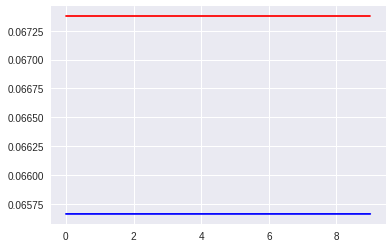

In [78]:
# Final evaluation of the model
scores = model1.evaluate(Xv, yv, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log1.history['acc'],'b') 
plt.plot(log1.history['val_acc'],'r')
plt.show()

In [0]:
def inception2BN(x, n = 32):
    p1 = Conv2D(n, 1, padding='same')(x)
    p1 = BatchNormalization()(p1)
    p1 = Activation('relu')(p1)
    p2 = Conv2D(n, 1, padding='same')(x)
    p2 = BatchNormalization()(p2)
    p2 = Activation('relu')(p2)
    p2 = Conv2D(n, 3, padding='same')(p2)
    p2 = BatchNormalization()(p2)
    p2 = Activation('relu')(p2)    
    p3 = Conv2D(n, 1, padding='same')(x)
    p3 = BatchNormalization()(p3)
    p3 = Activation('relu')(p3)    
    p3 = Conv2D(n, 5, padding='same')(p3)
    p3 = BatchNormalization()(p3)
    p3 = Activation('relu')(p3)  
    p4 = MaxPooling2D((3,3), strides=(1, 1), padding='same')(x)    
    p4 = Conv2D(n, 1, padding='same')(p4)
    p4 = BatchNormalization()(p4)
    p4 = Activation('relu')(p4)     

    c =  Concatenate(axis=-1)([p1,p2,p3,p4])
    return c

In [0]:
def model3():
    inputs = Input(Xtr.shape[1:])
    i1 = inception2BN(inputs)
    mp1 = MaxPooling2D((2,2))(i1)
    i2 = inception2BN(mp1)
    mp2 = MaxPooling2D((2,2))(i2) 
    f = Flatten()(mp2)
    d = Dense(128)(f)
    d = BatchNormalization()(d)
    d = Activation('relu')(d)
    out = Dense(16, activation='softmax')(d)
    model = Model(inputs, out)
    return model

Train on 1127 samples, validate on 282 samples
Epoch 1/50
 - 16s - loss: 2.8322 - acc: 0.1366 - val_loss: 3.0663 - val_acc: 0.1702
Epoch 2/50
 - 7s - loss: 1.4743 - acc: 0.6131 - val_loss: 2.5891 - val_acc: 0.2447
Epoch 3/50
 - 7s - loss: 0.9396 - acc: 0.8438 - val_loss: 2.4866 - val_acc: 0.2447
Epoch 4/50
 - 7s - loss: 0.5893 - acc: 0.9494 - val_loss: 2.4657 - val_acc: 0.2518
Epoch 5/50
 - 7s - loss: 0.3741 - acc: 0.9894 - val_loss: 2.4137 - val_acc: 0.2518
Epoch 6/50
 - 7s - loss: 0.2442 - acc: 0.9982 - val_loss: 2.4031 - val_acc: 0.2553
Epoch 7/50
 - 7s - loss: 0.1654 - acc: 1.0000 - val_loss: 2.4418 - val_acc: 0.2624
Epoch 8/50
 - 7s - loss: 0.1209 - acc: 1.0000 - val_loss: 2.4226 - val_acc: 0.2766
Epoch 9/50
 - 7s - loss: 0.0922 - acc: 1.0000 - val_loss: 2.4139 - val_acc: 0.2518
Epoch 10/50
 - 7s - loss: 0.0754 - acc: 1.0000 - val_loss: 2.4249 - val_acc: 0.2482
Epoch 11/50
 - 7s - loss: 0.0628 - acc: 1.0000 - val_loss: 2.4017 - val_acc: 0.2624
Epoch 12/50
 - 7s - loss: 0.0544 - ac

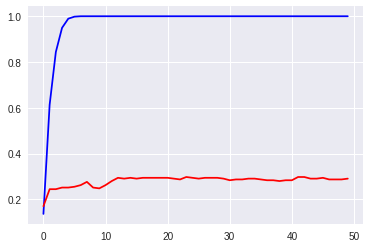

In [93]:
model3 = model3()
adam = Adam(lr=0.0001)
model3.compile(loss= 'categorical_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ])

# Fit the model
t0=time.time()
log3 = model3.fit(Xtr, ytr, validation_split=0.2, epochs=50, batch_size=200, verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores3 = model3.evaluate(Xv, yv, verbose=0)
print("CNN Error: %.2f%%" % (100-scores3[1]*100))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log3.history['acc'],'b') 
plt.plot(log3.history['val_acc'],'r')
plt.show()

In [0]:
from keras import regularizers
def model4():
    inputs = Input(Xtr.shape[1:])
    i1 = inception2BN(inputs)
    mp1 = MaxPooling2D((2,2))(i1)
    mp1 = Dropout(0.1)(mp1)
    i2 = inception2BN(mp1)
    mp2 = MaxPooling2D((2,2))(i2) 
    mp2 = Dropout(0.1)(mp2)
    f = Flatten()(mp2)
    d = Dense(128, activity_regularizer=regularizers.l1(0.01))(f)
    d = BatchNormalization()(d)
    d = Activation('relu')(d)
    out = Dense(16, activation='softmax')(d)
    model = Model(inputs, out)
    return model

In [111]:
model4 = model4()
adam = Adam(lr=0.0001)
model4.compile(loss= 'categorical_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ])

# Fit the model
t0=time.time()
log4 = model4.fit(Xtr, ytr, validation_split=0.2, epochs=50, batch_size=200, verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores4 = model4.evaluate(Xv, yv, verbose=0)
print("CNN Error: %.2f%%" % (100-scores4[1]*100))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log4.history['acc'],'b') 
plt.plot(log4.history['val_acc'],'r')
plt.show()

Train on 1127 samples, validate on 282 samples
Epoch 1/50


ResourceExhaustedError: ignored

In [24]:
import time
import numpy
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 123
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(y_test.shape)
print('Train Images shape: {} size: {:,}'.format(X_train.shape, X_train.size))

(10000, 10)
Train Images shape: (60000, 28, 28, 1) size: 47,040,000


In [0]:
class ResnetBuilder(object):
     
    input_shape=X_train.shape[1:]
    num_outputs=10
    block_fn=basic_block
    repetitions=20
    
    def build(input_shape, num_outputs, block_fn, repetitions):
      
       
        
        _handle_dim_ordering()
        if len(input_shape) != 3:
            raise Exception("Input shape should be a tuple (nb_channels, nb_rows, nb_cols)")

        # Permute dimension order if necessary
        if K.image_dim_ordering() == 'tf':
            input_shape = (input_shape[1], input_shape[2], input_shape[0])

        # Load function from str if needed.
        block_fn = _get_block(block_fn)

        input = Input(shape=input_shape)
        conv1 = _conv_bn_relu(filters=64, kernel_size=(7, 7), strides=(2, 2))(input)
        pool1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(conv1)

        block = pool1
        filters = 64
        for i, r in enumerate(repetitions):
            block = _residual_block(block_fn, filters=filters, repetitions=r, is_first_layer=(i == 0))(block)
            filters *= 2

        # Last activation
        block = _bn_relu(block)

        # Classifier block
        block_shape = K.int_shape(block)
        pool2 = AveragePooling2D(pool_size=(block_shape[ROW_AXIS], block_shape[COL_AXIS]),
                                 strides=(1, 1))(block)
        flatten1 = Flatten()(pool2)
        dense = Dense(units=num_outputs, kernel_initializer="he_normal",
                      activation="softmax")(flatten1)

        model = Model(inputs=Input(shape=input_shape), outputs=dense)
        return model

    @staticmethod
    def build_resnet_18(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [2, 2, 2, 2])

    @staticmethod
    def build_resnet_34(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [3, 4, 6, 3])

    @staticmethod
    def build_resnet_50(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 4, 6, 3])

    @staticmethod
    def build_resnet_101(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 4, 23, 3])

    @staticmethod
    def build_resnet_152(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 8, 36, 3])

In [26]:
model=Model()


TypeError: ignored

In [5]:
model.summary()

NameError: ignored